In [1]:
## *** import libraries *** ##
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [26]:
data = pd.read_csv(r"C:\Users\user\Documents\INSTITUTE RELATED FILES\Projects\Project2\Transposed_data_set.csv")

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10131 entries, 0 to 10130
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Customer_Code     10131 non-null  int64 
 1   Customer_Name     10131 non-null  object
 2   KIT_ITEM          10131 non-null  object
 3   OEM               10131 non-null  object
 4   Item_Description  10131 non-null  object
 5   Product_type      10131 non-null  object
 6   Vehicle1          10131 non-null  object
 7   Item_Code         10131 non-null  object
 8   Date              10131 non-null  object
 9   No_of_kits        10131 non-null  object
dtypes: int64(1), object(9)
memory usage: 791.6+ KB


In [24]:
data.columns

Index(['Customer_Code', 'Customer_Name', 'KIT_ITEM', 'OEM', 'Item_Description',
       'Product_type', 'Vehicle1', 'Item_Code', 'Date', 'No_of_kits'],
      dtype='object')

In [35]:
data.isnull().sum()

Customer_Code          0
Customer_Name          0
KIT_ITEM               0
OEM                    0
Item_Description     693
Product_type         693
Vehicle1             693
Item_Code              0
Date                   0
No_of_kits          4202
dtype: int64

## *** EXPLORATORY DATA ANALYSIS(EDA) *** ##

In [34]:
## *** Mean *** ##
data.No_of_kits.mean()

230.25974025974025

In [8]:
## *** Median *** ##
data.No_of_kits.median()

51.0

In [9]:
## *** Mode *** ##
data.No_of_kits.mode()

0    20.0
Name: No_of_kits, dtype: float64

In [11]:
## *** Variance *** ##
data.No_of_kits.var()

453270.01923076913

In [12]:
## *** Standard Deviation *** ##
data.No_of_kits.std()

673.253309855042

In [13]:
## *** Range *** ##
range = max(data.No_of_kits) - min(data.No_of_kits)
range

7899.0

In [14]:
data.No_of_kits.skew()

6.653510142108959

In [15]:
data.No_of_kits.kurt()

51.76084819549673

## *** Data Preprocessing *** ##

In [16]:
data.dtypes

Customer_Code         int64
Customer_Name        object
KIT_ITEM             object
OEM                  object
Item_Description     object
Product_type         object
Vehicle1             object
Item_Code            object
Date                 object
No_of_kits          float64
dtype: object

In [50]:
data['Date'] = data['Date'].astype('datetime64[ns]')
data.dtypes

Customer_Code                int64
Customer_Name               object
KIT_ITEM                    object
OEM                         object
Item_Description            object
Product_type                object
Vehicle1                    object
Item_Code                   object
Date                datetime64[ns]
No_of_kits                 float64
dtype: object

In [51]:
duplicate_values = data['Customer_Code'].duplicated()
duplicate_values

0        False
1         True
2         True
3         True
4         True
         ...  
10126     True
10127     True
10128     True
10129     True
10130     True
Name: Customer_Code, Length: 10126, dtype: bool

In [52]:
duplicate_values = data['Customer_Name'].duplicated()
duplicate_values

0        False
1         True
2         True
3         True
4         True
         ...  
10126     True
10127     True
10128     True
10129     True
10130     True
Name: Customer_Name, Length: 10126, dtype: bool

In [53]:
duplicate_values = data['KIT_ITEM'].duplicated()
duplicate_values

0        False
1         True
2         True
3         True
4         True
         ...  
10126     True
10127     True
10128     True
10129     True
10130     True
Name: KIT_ITEM, Length: 10126, dtype: bool

In [54]:
duplicate_values = data['OEM'].duplicated()
duplicate_values

0        False
1         True
2         True
3         True
4         True
         ...  
10126     True
10127     True
10128     True
10129     True
10130     True
Name: OEM, Length: 10126, dtype: bool

In [55]:
duplicate_values = data['Item_Description'].duplicated()
duplicate_values

0        False
1         True
2         True
3         True
4         True
         ...  
10126     True
10127     True
10128     True
10129     True
10130     True
Name: Item_Description, Length: 10126, dtype: bool

In [56]:
duplicate_values = data['Product_type'].duplicated()
duplicate_values

0        False
1         True
2         True
3         True
4         True
         ...  
10126     True
10127     True
10128     True
10129     True
10130     True
Name: Product_type, Length: 10126, dtype: bool

In [57]:
duplicate_values = data['Vehicle1'].duplicated()
duplicate_values

0        False
1         True
2         True
3         True
4         True
         ...  
10126     True
10127     True
10128     True
10129     True
10130     True
Name: Vehicle1, Length: 10126, dtype: bool

In [58]:
duplicate_values = data['Item_Code'].duplicated()
duplicate_values

0        False
1         True
2         True
3         True
4         True
         ...  
10126     True
10127     True
10128     True
10129     True
10130     True
Name: Item_Code, Length: 10126, dtype: bool

In [59]:
duplicate_values = data['No_of_kits'].duplicated()
duplicate_values

0        False
1        False
2        False
3        False
4         True
         ...  
10126     True
10127     True
10128     True
10129     True
10130     True
Name: No_of_kits, Length: 10126, dtype: bool

In [60]:
data.drop_duplicates(inplace = True)
print(data)

       Customer_Code Customer_Name    KIT_ITEM              OEM  \
0           10003033    Customer_1  KIT0000896   manufacturer_1   
1           10003033    Customer_1  KIT0000896   manufacturer_1   
2           10003033    Customer_1  KIT0000896   manufacturer_1   
3           10003033    Customer_1  KIT0000896   manufacturer_1   
4           10003033    Customer_1  KIT0000896   manufacturer_1   
...              ...           ...         ...              ...   
10126       10008761   Customer_76  KIT0001026  manufacturer_69   
10127       10008761   Customer_76  KIT0001026  manufacturer_69   
10128       10008761   Customer_76  KIT0001026  manufacturer_69   
10129       10008761   Customer_76  KIT0001026  manufacturer_69   
10130       10008761   Customer_76  KIT0001026  manufacturer_69   

                                        Item_Description Product_type  \
0                                     Standard FLC (AMC)     Housings   
1                                     Standard FL

In [61]:
data.isnull().sum()

Customer_Code         0
Customer_Name         0
KIT_ITEM              0
OEM                   0
Item_Description    693
Product_type        693
Vehicle1            693
Item_Code             0
Date                  0
No_of_kits            0
dtype: int64

In [62]:
updated_data = data

In [63]:
updated_data["No_of_kits"] = updated_data["No_of_kits"].fillna(updated_data["No_of_kits"].mean())

In [64]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10126 entries, 0 to 10130
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer_Code     10126 non-null  int64         
 1   Customer_Name     10126 non-null  object        
 2   KIT_ITEM          10126 non-null  object        
 3   OEM               10126 non-null  object        
 4   Item_Description  9433 non-null   object        
 5   Product_type      9433 non-null   object        
 6   Vehicle1          9433 non-null   object        
 7   Item_Code         10126 non-null  object        
 8   Date              10126 non-null  datetime64[ns]
 9   No_of_kits        10126 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 870.2+ KB


In [65]:
## *** Checking Outliers in each columns *** ##
data.dtypes

Customer_Code                int64
Customer_Name               object
KIT_ITEM                    object
OEM                         object
Item_Description            object
Product_type                object
Vehicle1                    object
Item_Code                   object
Date                datetime64[ns]
No_of_kits                 float64
dtype: object

<Axes: >

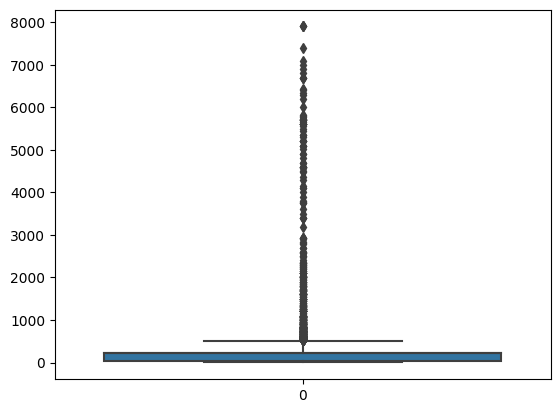

In [67]:
sns.boxplot(data["No_of_kits"])

In [69]:
from feature_engine.outliers import Winsorizer

In [70]:
## *** Instantiate the Winsorizer object *** ##
winsor_iqr = Winsorizer(capping_method = "iqr",
                        tail = "both", fold = 1.5,
                        variables = ["No_of_kits"])

In [71]:
## *** Fit and transform the data *** ##
updated_data = winsor_iqr.fit_transform(data[["No_of_kits"]])

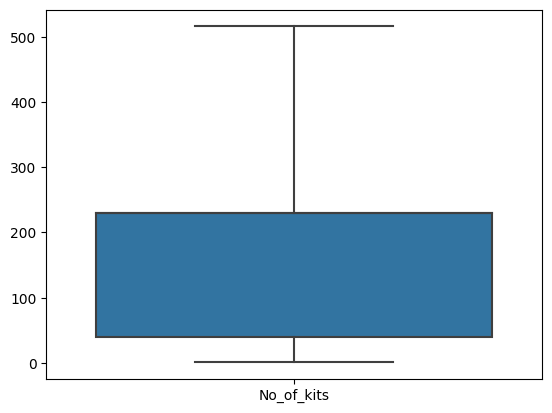

In [72]:
## *** Let's see boxplot *** ##
sns.boxplot(updated_data)
data["No_of_kits"] = updated_data

<Axes: >

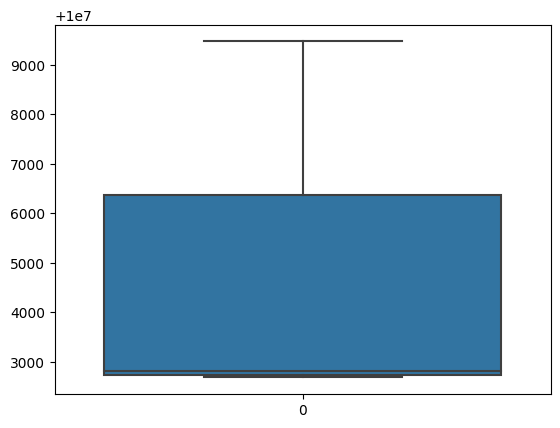

In [75]:
sns.boxplot(data["Customer_Code"])

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


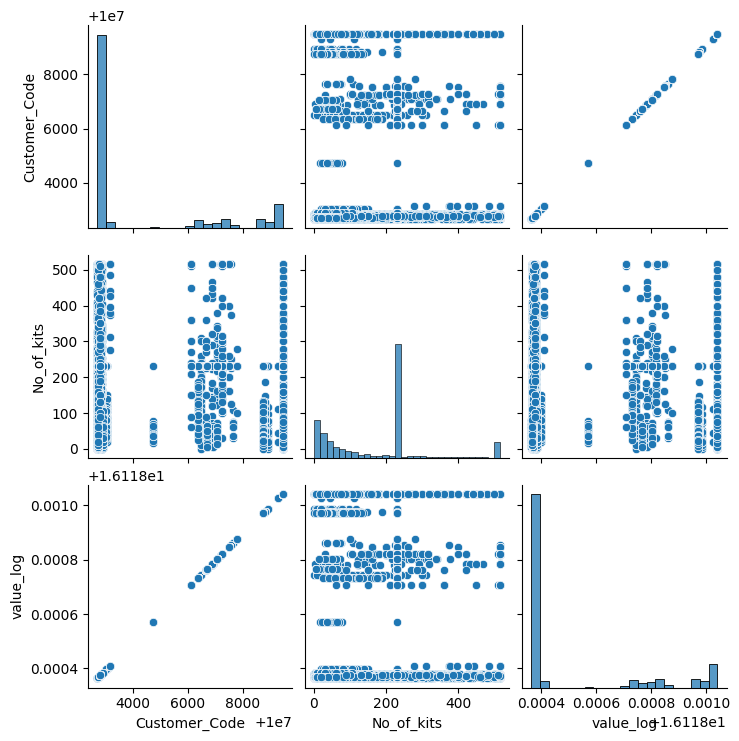

In [85]:
sns.pairplot(data)
plt.show()

In [76]:
variance = updated_data.var()

In [77]:
near_zero_var_features = variance[variance < 0.01]
print(near_zero_var_features)

Series([], dtype: float64)


In [78]:
updated_data["No_of_kits_bins"] = pd.cut(updated_data["No_of_kits"],
                                        bins = 3,
                                        labels = ["Low", "Medium", "High"])

In [79]:
print(updated_data)

       No_of_kits No_of_kits_bins
0        80.00000             Low
1        50.00000             Low
2       230.25974          Medium
3        40.00000             Low
4        40.00000             Low
...           ...             ...
10126    37.00000             Low
10127    26.00000             Low
10128    16.00000             Low
10129    25.00000             Low
10130    21.00000             Low

[10126 rows x 2 columns]


In [80]:
dummy_variables = pd.get_dummies(data["Customer_Name"],
                                 prefix = "Customer_Name")

In [81]:
data_with_dummies = pd.concat([data, dummy_variables], axis = 1)
print(data_with_dummies)

       Customer_Code Customer_Name    KIT_ITEM              OEM  \
0           10003033    Customer_1  KIT0000896   manufacturer_1   
1           10003033    Customer_1  KIT0000896   manufacturer_1   
2           10003033    Customer_1  KIT0000896   manufacturer_1   
3           10003033    Customer_1  KIT0000896   manufacturer_1   
4           10003033    Customer_1  KIT0000896   manufacturer_1   
...              ...           ...         ...              ...   
10126       10008761   Customer_76  KIT0001026  manufacturer_69   
10127       10008761   Customer_76  KIT0001026  manufacturer_69   
10128       10008761   Customer_76  KIT0001026  manufacturer_69   
10129       10008761   Customer_76  KIT0001026  manufacturer_69   
10130       10008761   Customer_76  KIT0001026  manufacturer_69   

                                        Item_Description Product_type  \
0                                     Standard FLC (AMC)     Housings   
1                                     Standard FL

In [82]:
data["value_log"] = np.log(data["No_of_kits"])

In [83]:
data["value_log"] = np.log(data["Customer_Code"])

In [84]:
print(data)

       Customer_Code Customer_Name    KIT_ITEM              OEM  \
0           10003033    Customer_1  KIT0000896   manufacturer_1   
1           10003033    Customer_1  KIT0000896   manufacturer_1   
2           10003033    Customer_1  KIT0000896   manufacturer_1   
3           10003033    Customer_1  KIT0000896   manufacturer_1   
4           10003033    Customer_1  KIT0000896   manufacturer_1   
...              ...           ...         ...              ...   
10126       10008761   Customer_76  KIT0001026  manufacturer_69   
10127       10008761   Customer_76  KIT0001026  manufacturer_69   
10128       10008761   Customer_76  KIT0001026  manufacturer_69   
10129       10008761   Customer_76  KIT0001026  manufacturer_69   
10130       10008761   Customer_76  KIT0001026  manufacturer_69   

                                        Item_Description Product_type  \
0                                     Standard FLC (AMC)     Housings   
1                                     Standard FL

## *** Performing Auto EDA *** ##

In [86]:
import sweetviz as sv

In [87]:
s = sv.analyze(data)
s.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [88]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported v0.1.806. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [89]:
AV = AutoViz_Class()

Shape of your Data Set loaded: (10131, 10)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  6
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    10 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 5 du

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Customer_Code,int64,0.000000,0,10002679.000000,10009470.000000,No issue
Customer_Name,object,0.000000,0,,,49 rare categories: Too many to list. Group them into a single category or drop the categories.
KIT_ITEM,object,0.000000,2,,,Possible high cardinality column with 291 unique values: Use hash encoding or text embedding to reduce dimension.
OEM,object,0.000000,0,,,41 rare categories: Too many to list. Group them into a single category or drop the categories.
Item_Description,object,6.843769,2,,,"693 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,, Possible high cardinality column with 263 unique values: Use hash encoding or text embedding to reduce dimension."
Product_type,object,6.843769,0,,,"693 missing values. Impute them with mean, median, mode, or a constant value such as 123., 12 rare categories: Too many to list. Group them into a single category or drop the categories., Mixed dtypes: has 2 different data types: object, float,"
Vehicle1,object,6.843769,0,,,"693 missing values. Impute them with mean, median, mode, or a constant value such as 123., 31 rare categories: Too many to list. Group them into a single category or drop the categories., Mixed dtypes: has 2 different data types: object, float,"
Item_Code,object,0.000000,0,,,"2 rare categories: ['A110000151', 'A16000005']. Group them into a single category or drop the categories."
Date,object,0.000000,0,,,No issue
No_of_kits,float64,41.447758,NA,1.000000,7900.000000,"4197 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 776 outliers greater than upper bound (357.50) or lower than lower bound(-182.50). Cap them or remove them."


Could not draw Distribution Plot


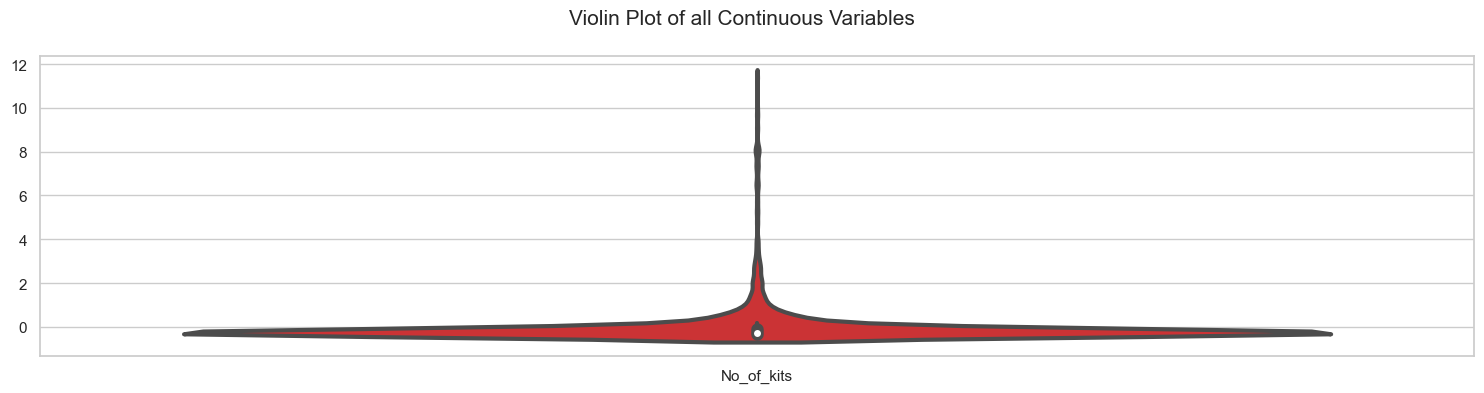

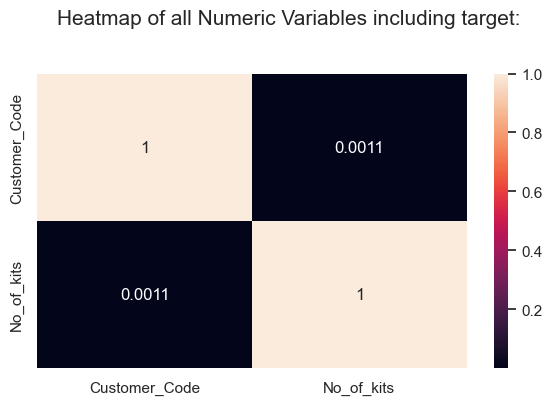

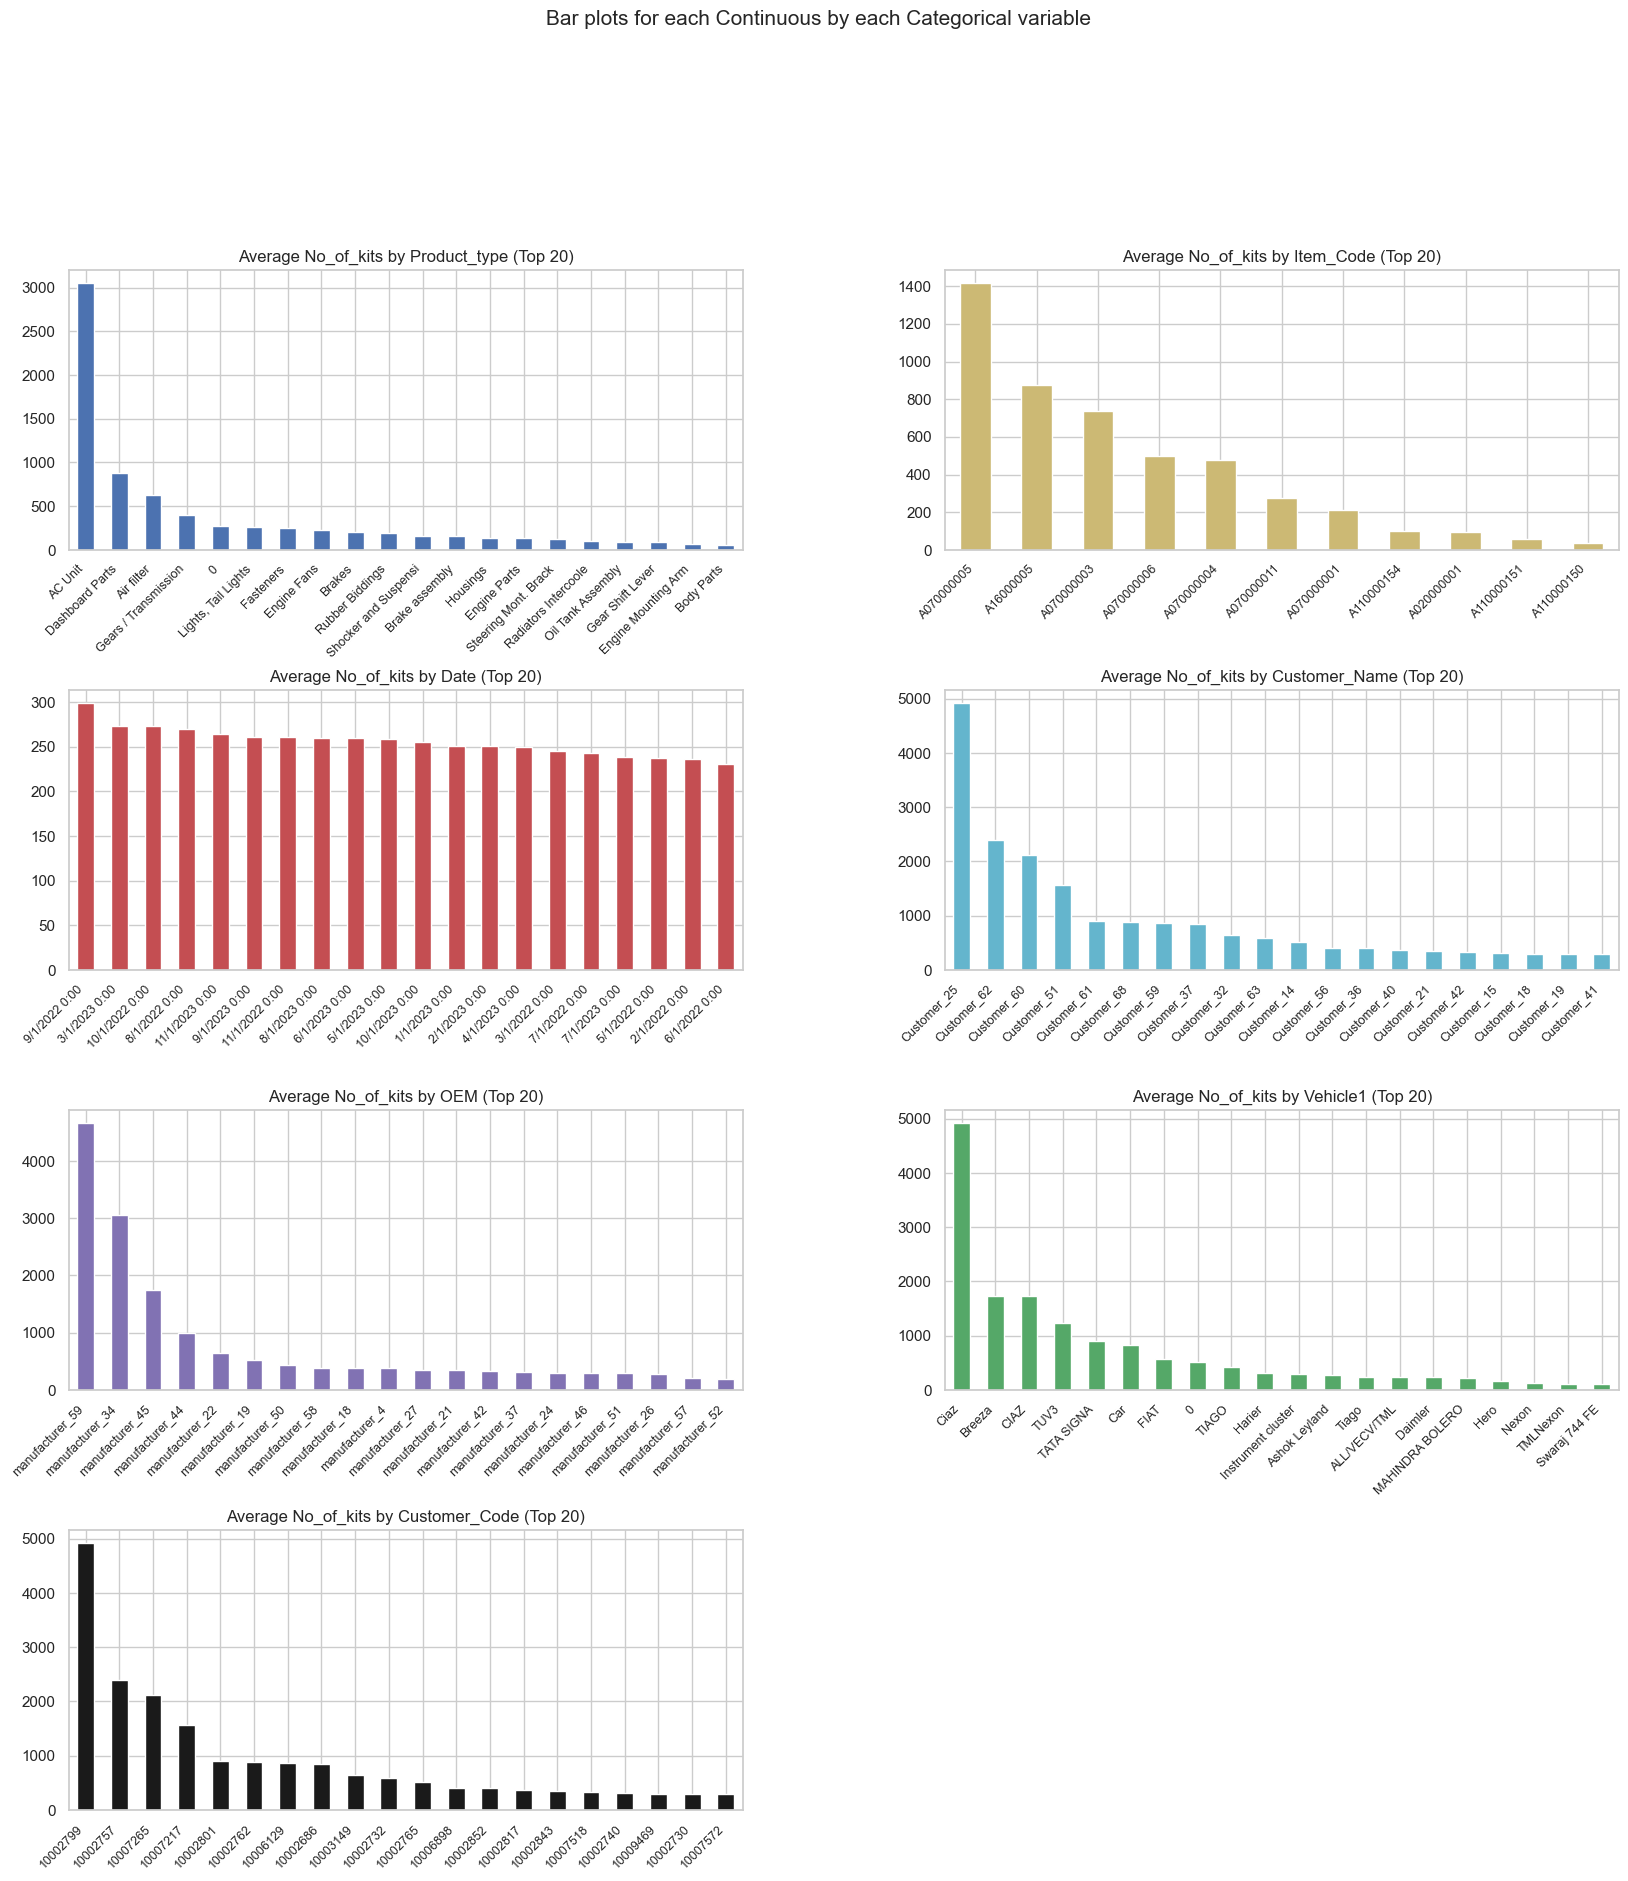

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |   

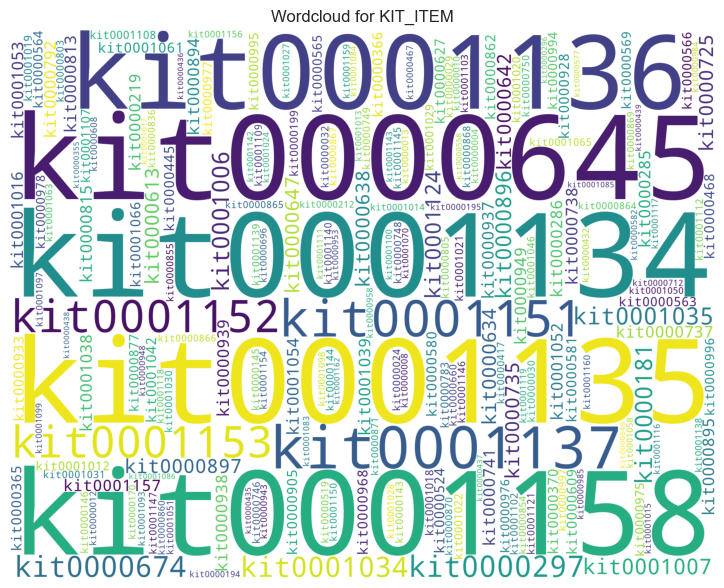

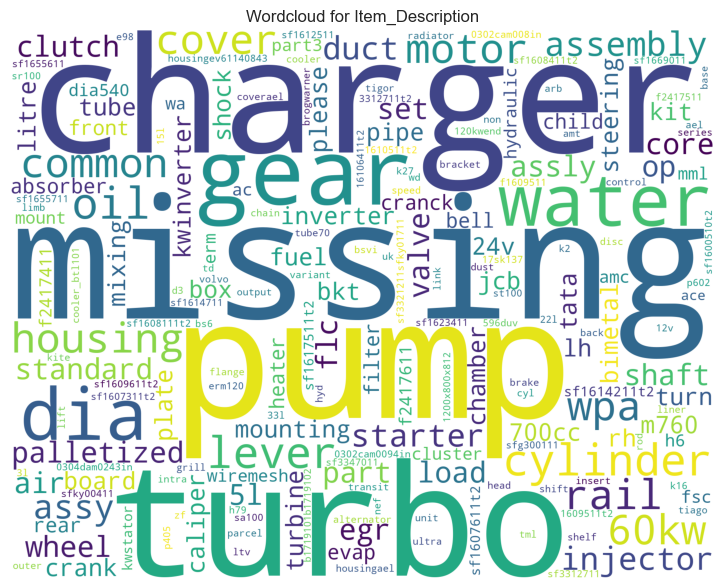

All Plots done
Time to run AutoViz = 37 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [91]:
%matplotlib inline
a = AV.AutoViz(r"C:\Users\user\Documents\INSTITUTE RELATED FILES\Projects\Project2\Transposed_data_set.csv")

In [92]:
import dtale

In [93]:
d = dtale.show(data)
d.open_browser()

In [95]:
from ydata_profiling import ProfileReport

In [96]:
p = ProfileReport(data)
p.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
## *** Auto Clean *** ##

In [97]:
from AutoClean import AutoClean

In [98]:
pipeline = AutoClean(data)
data_clean = pipeline.output

AutoClean process completed in 2.63776 seconds
Logfile saved to: C:\Users\user\Documents\INSTITUTE RELATED FILES\Projects\Project2\autoclean.log
